### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the dataset
data = pd.read_csv("matches_laliga")

In [3]:
data.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,2022-08-14,22:00,La Liga,Matchweek 1,Sun,Away,W,2.0,1.0,...,Match Report,NaN,29.0,15.0,17.9,1.0,0.0,0.0,2023,Real Madrid
1,2,2022-08-20,22:00,La Liga,Matchweek 2,Sat,Away,W,4.0,1.0,...,Match Report,NaN,15.0,6.0,18.7,0.0,1.0,2.0,2023,Real Madrid
2,3,2022-08-28,22:00,La Liga,Matchweek 3,Sun,Away,W,3.0,1.0,...,Match Report,NaN,19.0,6.0,15.6,1.0,0.0,0.0,2023,Real Madrid
3,4,2022-09-03,16:15,La Liga,Matchweek 4,Sat,Home,W,2.0,1.0,...,Match Report,NaN,22.0,5.0,17.2,2.0,0.0,0.0,2023,Real Madrid
4,6,2022-09-11,14:00,La Liga,Matchweek 5,Sun,Home,W,4.0,1.0,...,Match Report,NaN,22.0,7.0,21.5,2.0,0.0,0.0,2023,Real Madrid


In [4]:
data.shape

(2400, 28)

In [5]:
data.dtypes

Unnamed: 0        int64
Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF              float64
GA              float64
Opponent         object
xG              float64
xGA             float64
Poss            float64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes           float64
Sh              float64
SoT             float64
Dist            float64
FK              float64
PK              float64
PKatt           float64
Season            int64
Team             object
dtype: object

In [6]:
data['Match Report'].unique()

array(['Match Report'], dtype=object)

In [7]:
del data['Match Report']

In [8]:
data.info

<bound method DataFrame.info of       Unnamed: 0        Date   Time     Comp         Round  Day Venue Result  \
0              1  2022-08-14  22:00  La Liga   Matchweek 1  Sun  Away      W   
1              2  2022-08-20  22:00  La Liga   Matchweek 2  Sat  Away      W   
2              3  2022-08-28  22:00  La Liga   Matchweek 3  Sun  Away      W   
3              4  2022-09-03  16:15  La Liga   Matchweek 4  Sat  Home      W   
4              6  2022-09-11  14:00  La Liga   Matchweek 5  Sun  Home      W   
...          ...         ...    ...      ...           ...  ...   ...    ...   
2395          50  2020-07-05  17:00  La Liga  Matchweek 34  Sun  Home      L   
2396          51  2020-07-08  22:00  La Liga  Matchweek 35  Wed  Away      L   
2397          52  2020-07-12  14:00  La Liga  Matchweek 36  Sun  Home      L   
2398          53  2020-07-16  21:00  La Liga  Matchweek 37  Thu  Away      L   
2399          54  2020-07-19  21:00  La Liga  Matchweek 38  Sun  Home      D   

       

In [9]:
data['Team'].value_counts()

Real Madrid        120
Real Sociedad      120
Sevilla            120
Barcelona          120
Celta Vigo         120
Valencia           120
Getafe             120
Atletico Madrid    120
Osasuna            120
Athletic Club      120
Real Betis         120
Villarreal         120
Alaves             114
Levante            114
Granada            114
Cadiz               82
Elche               82
Espanyol            82
Valladolid          82
Mallorca            82
Eibar               76
Rayo Vallecano      44
Huesca              38
Leganes             38
Almeria              6
Girona               6
Name: Team, dtype: int64

In [10]:
data['Round'].value_counts()

Matchweek 1     80
Matchweek 3     80
Matchweek 4     80
Matchweek 5     80
Matchweek 6     80
Matchweek 2     80
Matchweek 30    60
Matchweek 25    60
Matchweek 26    60
Matchweek 27    60
Matchweek 28    60
Matchweek 29    60
Matchweek 33    60
Matchweek 31    60
Matchweek 32    60
Matchweek 23    60
Matchweek 34    60
Matchweek 35    60
Matchweek 36    60
Matchweek 37    60
Matchweek 24    60
Matchweek 19    60
Matchweek 22    60
Matchweek 20    60
Matchweek 21    60
Matchweek 18    60
Matchweek 17    60
Matchweek 16    60
Matchweek 9     60
Matchweek 15    60
Matchweek 14    60
Matchweek 13    60
Matchweek 12    60
Matchweek 11    60
Matchweek 10    60
Matchweek 8     60
Matchweek 7     60
Matchweek 38    60
Name: Round, dtype: int64

In [11]:
data[data["Team"] == "Barcelona"].sort_values("Date")

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Referee,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
1678,0,2019-08-16,21:00,La Liga,Matchweek 1,Fri,Away,L,0.0,1.0,...,Carlos del Cerro,NaN,11.0,2.0,13.1,0.0,0.0,0.0,2020,Barcelona
1679,1,2019-08-25,21:00,La Liga,Matchweek 2,Sun,Home,W,5.0,2.0,...,José González,NaN,21.0,7.0,15.5,0.0,0.0,0.0,2020,Barcelona
1680,2,2019-08-31,17:00,La Liga,Matchweek 3,Sat,Away,D,2.0,2.0,...,Juan Martínez,NaN,8.0,4.0,20.3,0.0,0.0,0.0,2020,Barcelona
1681,3,2019-09-14,21:00,La Liga,Matchweek 4,Sat,Home,W,5.0,2.0,...,José Sánchez,NaN,17.0,10.0,19.2,0.0,0.0,0.0,2020,Barcelona
1682,5,2019-09-21,21:00,La Liga,Matchweek 5,Sat,Away,L,0.0,2.0,...,Guillermo Cuadra,NaN,8.0,1.0,20.9,2.0,0.0,0.0,2020,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,...,José Luis Munuera,NaN,15.0,7.0,13.8,0.0,0.0,0.0,2023,Barcelona
8,2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,...,Ricardo de Burgos,NaN,25.0,9.0,13.9,1.0,0.0,0.0,2023,Barcelona
9,3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,...,Antonio Matéu Lahoz,NaN,19.0,6.0,16.0,2.0,0.0,0.0,2023,Barcelona
10,5,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,...,Carlos del Cerro,NaN,16.0,8.0,15.0,0.0,0.0,0.0,2023,Barcelona


In [12]:
data["Date"] = pd.to_datetime(data["Date"])

In [13]:
del data["Comp"]

In [14]:
data["Result"].value_counts()

W    866
L    866
D    668
Name: Result, dtype: int64

In [15]:
data["Result"]

0       W
1       W
2       W
3       W
4       W
       ..
2395    L
2396    L
2397    L
2398    L
2399    D
Name: Result, Length: 2400, dtype: object

In [16]:

for i in range(len(data["Result"])):
  if data["Result"][i] == "W":
    data["Result"][i]= 3
  elif data["Result"][i] == "L":
    data["Result"][i]= 0
  elif data["Result"][i] == "D":
    data["Result"][i]= 1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
data["Result"].astype("int")

data["Result"].value_counts()



3    866
0    866
1    668
Name: Result, dtype: int64

In [18]:
data["Notes"].nunique()

0

In [19]:
data =data.drop(["Notes"], axis=1)

In [20]:
data.describe()

,Unnamed: 0,GF,GA,xG,xGA,Poss,Attendance,Sh,SoT,Dist,FK,PK,PKatt,Season
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,1426.000000,2400.000000,2400.000000,2398.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,21.677083,1.252083,1.252083,1.203750,1.203750,50.001250,25839.230014,11.122917,3.657917,17.834112,0.471250,0.142083,0.183333,2021.100000
std,14.528303,1.158993,1.158993,0.737736,0.737736,11.556538,17857.918672,4.622324,2.211432,3.491943,0.706079,0.378975,0.436618,0.907566
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,13.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2020.000000
25%,8.000000,0.000000,0.000000,0.600000,0.600000,42.000000,13146.000000,8.000000,2.000000,15.500000,0.000000,0.000000,0.000000,2020.000000
50%,21.000000,1.000000,1.000000,1.100000,1.100000,50.000000,18292.000000,11.000000,3.000000,17.600000,0.000000,0.000000,0.000000,2021.000000
75%,34.000000,2.000000,2.000000,1.600000,1.600000,58.000000,37113.000000,14.000000,5.000000,19.700000,1.000000,0.000000,0.000000,2022.000000
max,57.000000,6.000000,6.000000,5.300000,5.300000,82.000000,93426.000000,36.000000,17.000000,44.800000,5.000000,3.000000,3.000000,2023.000000


In [21]:
#df = df[['GF','GA','xG','XGA','Poss','Attendance','Sh','SoT','Dist','FK','PK','Season']]

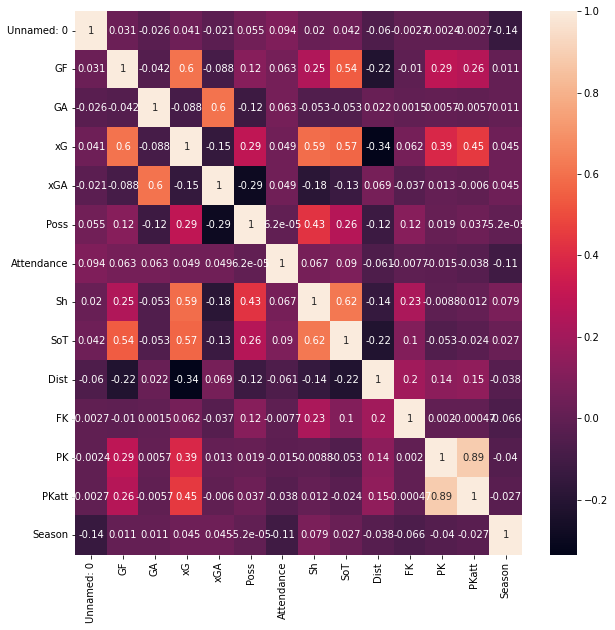

In [22]:
##correlation
import seaborn as sns
plt.figure(figsize=(10,10), facecolor='white')
cor_matrix=data.corr()
sns.heatmap(cor_matrix,annot=True)

In [23]:
data["Venue"] = data["Venue"].astype("category").cat.codes

In [24]:
data["Venue"] = data["Venue"].astype("int")

In [25]:
data["Opponent"] = data["Opponent"].astype("category").cat.codes

In [26]:
data["day_week"] = data["Date"].dt.dayofweek

In [27]:
data

,Unnamed: 0,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,...,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,day_week
0,1,2022-08-14,22:00,Matchweek 1,Sun,0,3,2.0,1.0,1,...,Juan Martínez,29.0,15.0,17.9,1.0,0.0,0.0,2023,Real Madrid,6
1,2,2022-08-20,22:00,Matchweek 2,Sat,0,3,4.0,1.0,6,...,Jesús Gil,15.0,6.0,18.7,0.0,1.0,2.0,2023,Real Madrid,5
2,3,2022-08-28,22:00,Matchweek 3,Sun,0,3,3.0,1.0,10,...,Mario Melero,19.0,6.0,15.6,1.0,0.0,0.0,2023,Real Madrid,6
3,4,2022-09-03,16:15,Matchweek 4,Sat,1,3,2.0,1.0,5,...,José Sánchez,22.0,5.0,17.2,2.0,0.0,0.0,2023,Real Madrid,5
4,6,2022-09-11,14:00,Matchweek 5,Sun,1,3,4.0,1.0,17,...,Jorge Figueroa,22.0,7.0,21.5,2.0,0.0,0.0,2023,Real Madrid,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,50,2020-07-05,17:00,Matchweek 34,Sun,1,0,0.0,1.0,15,...,Guillermo Cuadra,6.0,2.0,18.6,1.0,0.0,0.0,2020,Espanyol,6
2396,51,2020-07-08,22:00,Matchweek 35,Wed,0,0,0.0,1.0,4,...,José Luis Munuera,11.0,2.0,17.5,1.0,0.0,0.0,2020,Espanyol,2
2397,52,2020-07-12,14:00,Matchweek 36,Sun,1,0,0.0,2.0,8,...,Carlos del Cerro,14.0,3.0,20.7,3.0,0.0,0.0,2020,Espanyol,6
2398,53,2020-07-16,21:00,Matchweek 37,Thu,0,0,0.0,1.0,23,...,Eduardo Prieto,17.0,6.0,21.7,3.0,0.0,0.0,2020,Espanyol,3


In [28]:
data.dropna()

,Unnamed: 0,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,...,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season,Team,day_week
0,1,2022-08-14,22:00,Matchweek 1,Sun,0,3,2.0,1.0,1,...,Juan Martínez,29.0,15.0,17.9,1.0,0.0,0.0,2023,Real Madrid,6
1,2,2022-08-20,22:00,Matchweek 2,Sat,0,3,4.0,1.0,6,...,Jesús Gil,15.0,6.0,18.7,0.0,1.0,2.0,2023,Real Madrid,5
2,3,2022-08-28,22:00,Matchweek 3,Sun,0,3,3.0,1.0,10,...,Mario Melero,19.0,6.0,15.6,1.0,0.0,0.0,2023,Real Madrid,6
3,4,2022-09-03,16:15,Matchweek 4,Sat,1,3,2.0,1.0,5,...,José Sánchez,22.0,5.0,17.2,2.0,0.0,0.0,2023,Real Madrid,5
4,6,2022-09-11,14:00,Matchweek 5,Sun,1,3,4.0,1.0,17,...,Jorge Figueroa,22.0,7.0,21.5,2.0,0.0,0.0,2023,Real Madrid,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,37,2020-02-09,12:00,Matchweek 23,Sun,1,3,1.0,0.0,17,...,Antonio Matéu Lahoz,12.0,7.0,16.7,0.0,0.0,0.0,2020,Espanyol,6
2385,38,2020-02-16,12:00,Matchweek 24,Sun,0,1,2.0,2.0,22,...,Adrián Cordero,5.0,3.0,21.4,2.0,0.0,0.0,2020,Espanyol,6
2386,40,2020-02-23,16:00,Matchweek 25,Sun,0,0,1.0,2.0,24,...,Eduardo Prieto,5.0,1.0,23.0,0.0,1.0,1.0,2020,Espanyol,6
2387,42,2020-03-01,16:00,Matchweek 26,Sun,1,1,1.0,1.0,3,...,Alberola Rojas,9.0,3.0,15.4,1.0,0.0,0.0,2020,Espanyol,6


In [29]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_f = RandomForestClassifier(n_estimators=50, min_samples_split=12, random_state=0)

In [32]:
train = data[data["Date"] < '2022-06-01']

In [33]:
test = data[data["Date"] > '2022-06-01']

In [34]:
#X_train = ['Venue','Opponent','day_week','GF','GA','xG','Poss','Attendance','Sh','SoT','Dist','FK','PK','Season']

In [35]:
X_train = ['Venue','Opponent','day_week','Sh','SoT','Dist','FK','PK','Season','Attendance']

In [36]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [37]:
#train.fillna(999, inplace=True)

In [38]:
random_f.fit(train[X_train], train["Result"])

RandomForestClassifier(min_samples_split=12, n_estimators=50, random_state=0)

In [39]:
predct = random_f.predict(test[X_train])

In [40]:
from sklearn.metrics import accuracy_score
# Accuracy Score = (TP+TN)/ (TP+FN+TN+FP)
accuracy = accuracy_score(test["Result"], predct)
accuracy

0.6166666666666667

In [41]:
combined = pd.DataFrame(dict(actual=test["Result"], predicted=predct))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1,3
actual,,,
0,32,10,9
1,3,6,9
3,10,5,36


In [42]:
from sklearn.metrics import precision_score, recall_score

print("Precision Score : ",precision_score(test["Result"], predct, pos_label='positive', average='micro'))
print("Recall Score : ",recall_score(test["Result"], predct, pos_label='positive', average='micro'))


Precision Score :  0.6166666666666667
Recall Score :  0.6166666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [43]:
grouped_matches = data.groupby("Team")

In [44]:
group = grouped_matches.get_group("Barcelona").sort_values("Date")

In [45]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("Date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [46]:
cols = ["GF", "GA", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,Unnamed: 0,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,...,Team,day_week,GF_rolling,GA_rolling,Sh_rolling,SoT_rolling,Dist_rolling,FK_rolling,PK_rolling,PKatt_rolling
1681,3,2019-09-14,21:00,Matchweek 4,Sat,1,3,5.0,2.0,23,...,Barcelona,5,2.333333,1.666667,13.333333,4.333333,16.300000,0.000000,0.0,0.0
1682,5,2019-09-21,21:00,Matchweek 5,Sat,0,0,0.0,2.0,13,...,Barcelona,5,4.000000,2.000000,15.333333,7.000000,18.333333,0.000000,0.0,0.0
1683,6,2019-09-24,21:00,Matchweek 6,Tue,1,3,2.0,1.0,25,...,Barcelona,1,2.333333,2.000000,11.000000,5.000000,20.133333,0.666667,0.0,0.0
1684,7,2019-09-28,16:00,Matchweek 7,Sat,0,3,2.0,0.0,11,...,Barcelona,5,2.333333,1.666667,11.333333,5.000000,18.500000,1.000000,0.0,0.0
1685,9,2019-10-06,21:00,Matchweek 8,Sun,1,3,4.0,0.0,22,...,Barcelona,6,1.333333,1.000000,9.000000,3.666667,18.700000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1,2022-08-21,22:00,Matchweek 2,Sun,0,3,4.0,1.0,21,...,Barcelona,6,0.000000,0.666667,13.666667,3.000000,18.500000,0.666667,0.0,0.0
8,2,2022-08-28,19:30,Matchweek 3,Sun,1,3,4.0,0.0,24,...,Barcelona,6,1.333333,1.000000,17.000000,5.000000,16.500000,0.333333,0.0,0.0
9,3,2022-09-03,21:00,Matchweek 4,Sat,0,3,3.0,0.0,22,...,Barcelona,5,2.666667,0.333333,20.333333,7.000000,14.766667,0.666667,0.0,0.0
10,5,2022-09-10,18:30,Matchweek 5,Sat,0,3,4.0,0.0,7,...,Barcelona,5,3.666667,0.333333,19.666667,7.333333,14.566667,1.000000,0.0,0.0


In [47]:
matches_rolling = data.groupby("Team").apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling

Unnamed: 0       Date   Time        Round  Day  Venue  \
Team                                                                     
Alaves     2213           3 2019-09-15  14:00  Matchweek 4  Sun      1   
           2214           4 2019-09-22  18:30  Matchweek 5  Sun      0   
           2215           5 2019-09-26  21:00  Matchweek 6  Thu      0   
           2216           6 2019-09-29  16:00  Matchweek 7  Sun      1   
           2217           7 2019-10-05  18:30  Matchweek 8  Sat      0   
...                     ...        ...    ...          ...  ...    ...   
Villarreal 31             2 2022-08-21  19:30  Matchweek 2  Sun      0   
           32             4 2022-08-28  17:30  Matchweek 3  Sun      0   
           33             5 2022-09-04  18:30  Matchweek 4  Sun      1   
           34             7 2022-09-11  21:00  Matchweek 5  Sun      0   
           35             9 2022-09-18  16:15  Matchweek 6  Sun      1   

                 Result   GF   GA  Opponent  ...        Team  day_week  \
Team                                         ...                         
Alaves     2213       0  0.0  1.0        22  ...      Alaves         6   
           2214       0  0.0  2.0         2  ...      Alaves         6   
           2215       0  0.0  3.0        21  ...      Alaves         3   
           2216       3  2.0  0.0        17  ...      Alaves         6   
           2217       0  1.0  2.0        23  ...      Alaves         5   
...                 ...  ...  ...       ...  ...         ...       ...   
Villarreal 31         3  2.0  0.0         3  ...  Villarreal         6   
           32         1  0.0  0.0        11  ...  Villarreal         6   
           33         3  4.0  0.0         9  ...  Villarreal         6   
           34         0  0.0  1.0         5  ...  Villarreal         6   
           35         1  1.0  1.0        22  ...  Villarreal         6   

                 GF_rolling  GA_rolling Sh_rolling SoT_rolling Dist_rolling  \
Team                                                                          
Alaves     2213    0.666667    0.333333   7.333333    1.666667    16.066667   
           2214    0.333333    0.666667   6.666667    1.000000    15.933333   
           2215    0.333333    1.333333   5.000000    0.666667    16.166667   
           2216    0.000000    2.000000   4.666667    0.333333    17.166667   
           2217    0.666667    1.666667   6.000000    2.000000    18.233333   
...                     ...         ...        ...         ...          ...   
Villarreal 31      2.000000    0.666667   8.333333    3.666667    15.000000   
           32      2.333333    0.000000  11.333333    4.000000    15.000000   
           33      1.666667    0.000000  13.666667    5.000000    15.933333   
           34      2.000000    0.000000  16.333333    7.000000    14.533333   
           35      1.333333    0.333333  14.333333    6.000000    14.333333   

                 FK_rolling  PK_rolling  PKatt_rolling  
Team                                                    
Alaves     2213    0.333333    0.000000       0.000000  
           2214    0.000000    0.000000       0.000000  
           2215    0.000000    0.000000       0.000000  
           2216    0.000000    0.000000       0.000000  
           2217    0.000000    0.333333       0.333333  
...                     ...         ...            ...  
Villarreal 31      0.333333    0.000000       0.000000  
           32      0.000000    0.000000       0.000000  
           33      0.000000    0.000000       0.000000  
           34      0.333333    0.000000       0.000000  
           35      0.333333    0.000000       0.000000  

[2322 rows x 34 columns]

In [48]:
matches_rolling = matches_rolling.droplevel('Team')
matches_rolling

,Unnamed: 0,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,...,Team,day_week,GF_rolling,GA_rolling,Sh_rolling,SoT_rolling,Dist_rolling,FK_rolling,PK_rolling,PKatt_rolling
2213,3,2019-09-15,14:00,Matchweek 4,Sun,1,0,0.0,1.0,22,...,Alaves,6,0.666667,0.333333,7.333333,1.666667,16.066667,0.333333,0.000000,0.000000
2214,4,2019-09-22,18:30,Matchweek 5,Sun,0,0,0.0,2.0,2,...,Alaves,6,0.333333,0.666667,6.666667,1.000000,15.933333,0.000000,0.000000,0.000000
2215,5,2019-09-26,21:00,Matchweek 6,Thu,0,0,0.0,3.0,21,...,Alaves,3,0.333333,1.333333,5.000000,0.666667,16.166667,0.000000,0.000000,0.000000
2216,6,2019-09-29,16:00,Matchweek 7,Sun,1,3,2.0,0.0,17,...,Alaves,6,0.000000,2.000000,4.666667,0.333333,17.166667,0.000000,0.000000,0.000000
2217,7,2019-10-05,18:30,Matchweek 8,Sat,0,0,1.0,2.0,23,...,Alaves,5,0.666667,1.666667,6.000000,2.000000,18.233333,0.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,2,2022-08-21,19:30,Matchweek 2,Sun,0,3,2.0,0.0,3,...,Villarreal,6,2.000000,0.666667,8.333333,3.666667,15.000000,0.333333,0.000000,0.000000
32,4,2022-08-28,17:30,Matchweek 3,Sun,0,1,0.0,0.0,11,...,Villarreal,6,2.333333,0.000000,11.333333,4.000000,15.000000,0.000000,0.000000,0.000000
33,5,2022-09-04,18:30,Matchweek 4,Sun,1,3,4.0,0.0,9,...,Villarreal,6,1.666667,0.000000,13.666667,5.000000,15.933333,0.000000,0.000000,0.000000
34,7,2022-09-11,21:00,Matchweek 5,Sun,0,0,0.0,1.0,5,...,Villarreal,6,2.000000,0.000000,16.333333,7.000000,14.533333,0.333333,0.000000,0.000000


In [49]:
matches_rolling.index = range(matches_rolling.shape[0])

In [50]:
def make_predictions(data, X_train):
    train = data[data["Date"] < '2022-01-01']
    test = data[data["Date"] > '2022-01-01']
    random_f.fit(train[X_train], train["Result"])
    preds = random_f.predict(test[X_train])
    combined = pd.DataFrame(dict(actual=test["Result"], predicted=preds), index=test.index)
    precision = precision_score(test["Result"], preds, pos_label='positive', average='micro')
    return combined, precision

In [51]:
combined, precision = make_predictions(matches_rolling, X_train + new_cols)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [52]:
precision

0.5176470588235295

In [53]:
combined = combined.merge(matches_rolling[["Date", "Team", "Opponent", "Result"]], left_index=True, right_index=True)

In [54]:
combined.head(10)

,actual,predicted,Date,Team,Opponent,Result
91,1,0,2022-01-02,Alaves,21,1
92,1,1,2022-01-09,Alaves,2,1
93,0,0,2022-01-18,Alaves,5,0
94,0,0,2022-01-23,Alaves,4,0
95,0,0,2022-02-05,Alaves,9,0
96,3,3,2022-02-13,Alaves,23,3
97,0,0,2022-02-19,Alaves,20,0
98,1,0,2022-02-26,Alaves,11,1
99,1,0,2022-03-04,Alaves,22,1
100,0,0,2022-03-13,Alaves,21,0


In [55]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Alaves": "Alaves"} 
mapping = MissingDict(**map_values)


In [56]:
combined["new_team"] = combined["Team"].map(mapping)

In [59]:
#combined.atype()

In [72]:
merged = combined.merge(combined, left_on=[["Date", "new_team"]], right_on=[['Date', 'Opponent']], how='left')

KeyError: ignored

In [ ]:
merged

In [ ]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_x"] == 3) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()